In [25]:
import os
import pandas as pd
from shutil import copy

# Define input directory containing the processed images
input_directory = r'C:\Users\Harsh\Desktop\ML Project\selected\processed'

# Load the Excel sheet
excel_file = r'C:\Users\Harsh\Downloads\Compressed\TaibLabelsSorted.xlsx'  # Provide the path to your Excel file
df = pd.read_excel(excel_file)

# Define output directory to store images based on labels
output_directory = os.path.join(input_directory, 'organized')
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Iterate through each row in the Excel sheet
for index, row in df.iterrows():
    # Extract image name and label from the row
    image_name = row['image']
    label = row['level']

    # Add .jpeg extension to image name
    image_name_with_extension = image_name + '.jpeg'

    # Create folder for label if it doesn't exist
    label_folder = os.path.join(output_directory, str(label))
    if not os.path.exists(label_folder):
        os.makedirs(label_folder)

    # Move the processed image to the label folder
    image_source = os.path.join(input_directory, image_name_with_extension)
    image_destination = os.path.join(label_folder, image_name_with_extension)
    copy(image_source, image_destination)

    print(f"Moved {image_name_with_extension} to label folder {label}")

print("All images organized successfully.")


Moved 10_left.jpeg to label folder 0
Moved 10_right.jpeg to label folder 0
Moved 13_left.jpeg to label folder 0
Moved 13_right.jpeg to label folder 0
Moved 17_left.jpeg to label folder 0
Moved 19_left.jpeg to label folder 0
Moved 19_right.jpeg to label folder 0
Moved 20_left.jpeg to label folder 0
Moved 20_right.jpeg to label folder 0
Moved 21_left.jpeg to label folder 0
Moved 21_right.jpeg to label folder 0
Moved 22_left.jpeg to label folder 0
Moved 22_right.jpeg to label folder 0
Moved 23_left.jpeg to label folder 0
Moved 23_right.jpeg to label folder 0
Moved 25_left.jpeg to label folder 0
Moved 25_right.jpeg to label folder 0
Moved 31_left.jpeg to label folder 0
Moved 31_right.jpeg to label folder 0
Moved 33_left.jpeg to label folder 0
Moved 33_right.jpeg to label folder 0
Moved 36_right.jpeg to label folder 0
Moved 40_right.jpeg to label folder 0
Moved 41_left.jpeg to label folder 0
Moved 41_right.jpeg to label folder 0
Moved 42_left.jpeg to label folder 0
Moved 42_right.jpeg to la

In [75]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define function to load images and labels
def load_data(data_dir, target_size=(256, 256)):
    # Initialize empty lists to store images and labels
    data = []
    labels = []

    # Define categories
    categories = os.listdir(data_dir)
    

    # Loop through categories
    for category_index, category in enumerate(categories):
        # Path to the category directory
        category_dir = os.path.join(data_dir, category)
        # Get the label based on the index of the category
        label = category_index

        for img_file in os.listdir(category_dir):
            # Read the image
            img_path = os.path.join(category_dir, img_file)
            img = cv2.imread(img_path)
            # Resize the image to the target size
            img = cv2.resize(img, target_size)
            # Normalize the image pixels to be in the range [0, 1]
            img = img.astype('float32') / 255.0
            # Append the image and label to the data lists
            data.append(img)
            labels.append(label)

    return np.array(data), np.array(labels)

# Path to the training data directory
train_data_dir = r'C:\Users\Harsh\Desktop\ML Project\selected\processed\organized'

# Load training data
train_data, train_labels = load_data(train_data_dir)

# Split the training data into training and validation sets (80-20 split)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("Train data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)





Train data shape: (2988, 256, 256, 3)
Validation data shape: (748, 256, 256, 3)


In [76]:
train_labels.shape

(2988,)

In [77]:

val_labels.shape

(748,)

In [78]:
img_rows, img_cols = 256,256
input_shape = (img_rows, img_cols, 3)
# network parameters
batch_size = 32
num_classes = 5
epochs = 10


from keras.utils import to_categorical
# Convert the target variable to categorical format
train_labels = to_categorical(train_labels, num_classes)
val_labels = to_categorical(val_labels, num_classes)



In [91]:
val_labels.shape

(748, 5)

In [80]:
train_labels.shape

(2988, 5)

In [81]:
import matplotlib.pyplot as plt

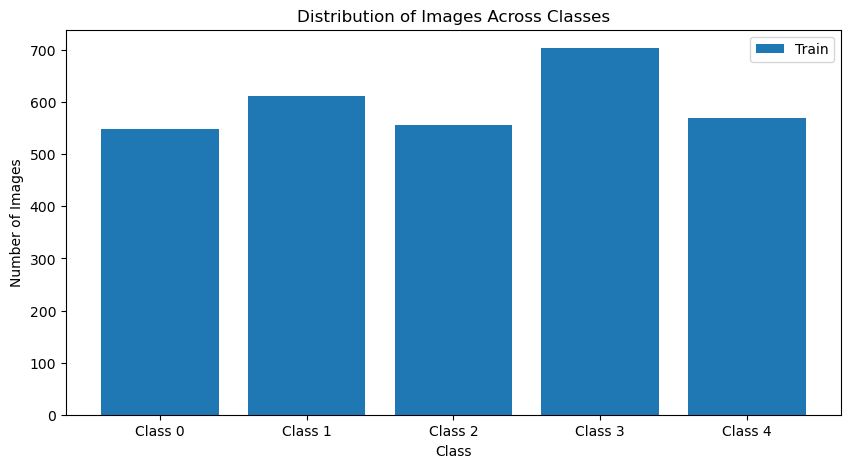

In [82]:
# Count the number of images in each class
train_class_counts = np.sum(train_labels, axis=0)
val_class_counts = np.sum(val_labels, axis=0)

# Plot the distribution of images across classes
plt.figure(figsize=(10, 5))
plt.bar(range(num_classes), train_class_counts, label='Train')

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')
plt.xticks(range(num_classes), ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.legend()
plt.show()

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Define image dimensions
img_channels = 3

# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, img_channels)))

# Add the second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add the max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer for regularization
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Add the dense layer
model.add(Dense(128, activation='relu'))

# Add another dropout layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

# Print the model summary
model.summary()


C:\Users\Harsh\miniconda3\envs\gprMax\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 252, 252, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1016064)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     130,056,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,076,357 (496.20 MB)

 Trainable params: 130,076,357 (496.20 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Loss
              metrics=['accuracy'])

In [36]:
model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(val_data, val_labels))
accuracy = model.evaluate(val_data, val_labels, verbose=0)
print('Validation Accuracy:', accuracy[1])

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.2107 - loss: 4.5239 - val_accuracy: 0.2834 - val_loss: 1.5879
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.2944 - loss: 1.5732 - val_accuracy: 0.2955 - val_loss: 1.5666
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.3070 - loss: 1.5354 - val_accuracy: 0.3182 - val_loss: 1.5427
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.4007 - loss: 1.4106 - val_accuracy: 0.3195 - val_loss: 1.5427
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.5308 - loss: 1.1909 - val_accuracy: 0.3048 - val_loss: 1.6571
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.7012 - loss: 0.8294 - val_accuracy: 0.3209 - val_loss: 1.8787
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.8001 - loss: 0.5572 - val_accuracy: 0.3182 - val_loss: 2.1288
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.8677 - loss: 0.4191 - val_accuracy: 0.3209 - v

In [83]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from keras import regularizers

# Define the model
model = Sequential()

# First layer: 32 filters of size 7×7
model.add(Conv2D(32, (7, 7), strides=(1, 1), padding='same', input_shape=input_shape, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Second layer: 32 filters of size 5×5
model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Third layer with 32 filters 3×3 kernel stride 2
model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fourth layer: 64 filters of size 3×3
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fifth layer with 64 filters 3×3 kernel stride 2
model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# # Sixth layer: 128 filters of size 3×3
# model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Seventh layer with 128 filters 3×3 kernel stride 2
# model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Eighth layer: 128 filters of size 3×3
# model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# # Ninth layer: 128 filters of size 1×1
# model.add(Conv2D(128, (1, 1), strides=(1, 1), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Add the dense layer
model.add(Dense(128, activation='relu'))

# Add another dropout layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(5, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\Harsh\miniconda3\envs\gprMax\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_87 (Conv2D)                   │ (None, 256, 256, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_84               │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_89 (Dropout)                 │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_88 (Conv2D)                   │ (None, 256, 256, 32)        │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_85               │ (None, 256, 256, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_90 (Dropout)                 │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_89 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_86               │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_91 (Dropout)                 │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_90 (Conv2D)                   │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_87               │ (None, 128, 128, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_91 (Conv2D)                   │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_88               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      33,554,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_94 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             6

 Total params: 33,651,141 (128.37 MB)

 Trainable params: 33,650,693 (128.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [86]:
from keras.applications import ResNet18
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam


ImportError: cannot import name 'ResNet18' from 'keras.applications' (C:\Users\Harsh\miniconda3\envs\gprMax\Lib\site-packages\keras\applications\__init__.py)

In [92]:
import torch
import torchvision.models as models

# Download pre-trained ResNet-18 model
resnet18 = models.resnet18(pretrained=True)

# Freeze all layers in the pre-trained model
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the last fully connected layer to match your number of classes
num_classes = 5
num_ftrs = resnet18.fc.in_features
resnet18.fc = torch.nn.Linear(num_ftrs, num_classes)

# Print modified model architecture
print(resnet18)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [98]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms

# Define your Dataset class
class CustomDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    # You can add more transformations here as needed
])

# Create datasets and dataloaders
train_dataset = CustomDataset(train_data, train_labels, transform=transform)
val_dataset = CustomDataset(val_data, val_labels, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


# Freeze all layers in the pre-trained model
for param in resnet18.parameters():
    param.requires_grad = False

# Modify the last fully connected layer to match your number of classes
num_classes = 5
num_ftrs = resnet18.fc.in_features
resnet18.fc = torch.nn.Linear(num_ftrs, num_classes)  # Replace the last layer with a new fully connected layer

# Train your model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_dataset)

    # Validate your model
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            
            _, predicted = torch.max(outputs, 1)
            
            # Convert one-hot encoded labels to class indices
            _, labels = torch.max(labels, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    val_accuracy = correct / total
    val_loss /= len(val_dataset)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {epoch_loss:.4f}, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Acc: {val_accuracy:.4f}')

# Print modified model architecture
print(resnet18)


Epoch [1/10], Train Loss: 1.6708, Val Loss: 1.6849, Val Acc: 0.1832
Epoch [2/10], Train Loss: 1.6707, Val Loss: 1.6793, Val Acc: 0.1885
Epoch [3/10], Train Loss: 1.6709, Val Loss: 1.6799, Val Acc: 0.1858
Epoch [4/10], Train Loss: 1.6661, Val Loss: 1.6805, Val Acc: 0.1845
Epoch [5/10], Train Loss: 1.6701, Val Loss: 1.6802, Val Acc: 0.1858
Epoch [6/10], Train Loss: 1.6707, Val Loss: 1.6804, Val Acc: 0.1912
Epoch [7/10], Train Loss: 1.6725, Val Loss: 1.6824, Val Acc: 0.1858
Epoch [8/10], Train Loss: 1.6697, Val Loss: 1.6813, Val Acc: 0.1832
Epoch [9/10], Train Loss: 1.6706, Val Loss: 1.6813, Val Acc: 0.1845
Epoch [10/10], Train Loss: 1.6704, Val Loss: 1.6795, Val Acc: 0.1845
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Seque